Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load dataset

In [4]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('googleplaystore.csv')

Saving googleplaystore.csv to googleplaystore (1).csv


Basic inspection

In [26]:
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size    Installs  Type  Price Content Rating  \
0      159  19.0     10000.0  Free    0.0       Everyone   
1      967  14.0    500000.0  Free    0.0       Everyone   
2    87510   8.7   5000000.0  Free    0.0       Everyone   
3   215644  25.0  50000000.0  Free    0.0           Teen   
4      967   2.8    100000.0  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pr

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   int64  
 4   Size            7424 non-null   float64
 5   Installs        8892 non-null   float64
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8892 non-null   object 
 12  Android Ver     8892 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 972.6+ KB
None


In [25]:
print(df.describe())

            Rating       Reviews         Size      Installs        Price
count  8892.000000  8.892000e+03  7424.000000  8.892000e+03  8892.000000
mean      4.187877  4.727764e+05    37.568386  1.648965e+07     0.963155
std       0.522377  2.905052e+06    94.963475  8.637600e+07    16.189341
min       1.000000  1.000000e+00     1.000000  1.000000e+00     0.000000
25%       4.000000  1.640000e+02     5.900000  1.000000e+04     0.000000
50%       4.300000  4.714500e+03    16.000000  5.000000e+05     0.000000
75%       4.500000  7.126675e+04    37.000000  5.000000e+06     0.000000
max       5.000000  7.815831e+07   994.000000  1.000000e+09   400.000000


Clean data: Remove duplicate entries and invalid rows

In [6]:
df.drop_duplicates(inplace=True)
df = df[df['Rating'] <= 5]

Fill missing values

In [7]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Type'] = df['Type'].fillna('Free')
df['Current Ver'] = df['Current Ver'].fillna('Unknown')
df['Android Ver'] = df['Android Ver'].fillna('Varies with device')

Convert columns to appropriate data types

In [8]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(float)
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

Distribution of Ratings

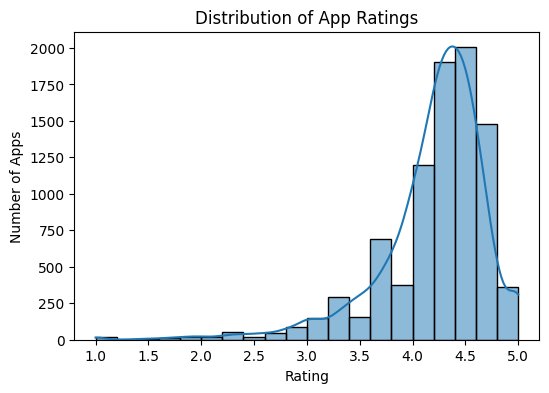

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()

Top Categories by Number of Apps

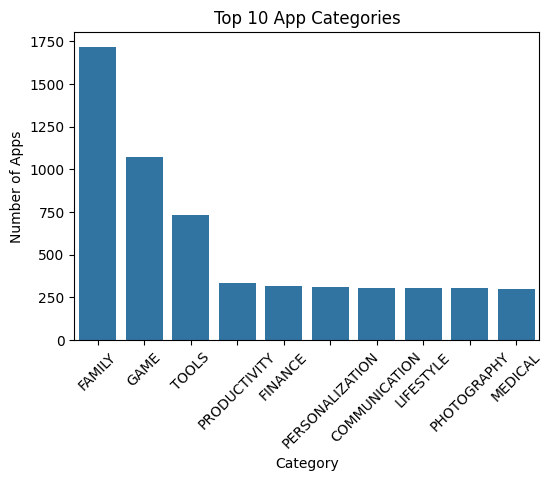

In [18]:
top_categories = df['Category'].value_counts().head(10)
plt.figure(figsize=(6,4))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top 10 App Categories')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()

Free vs Paid Apps: Count

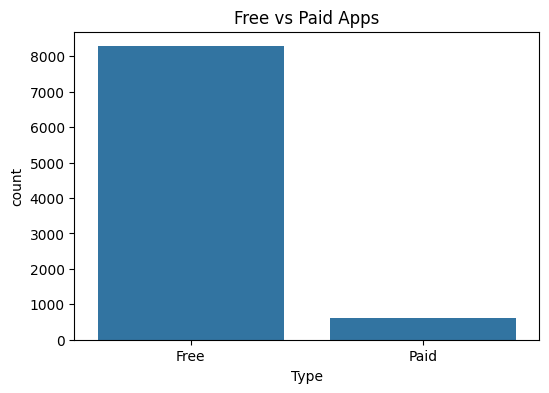

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Type')
plt.title('Free vs Paid Apps')
plt.show()

Price Distribution for Paid Apps

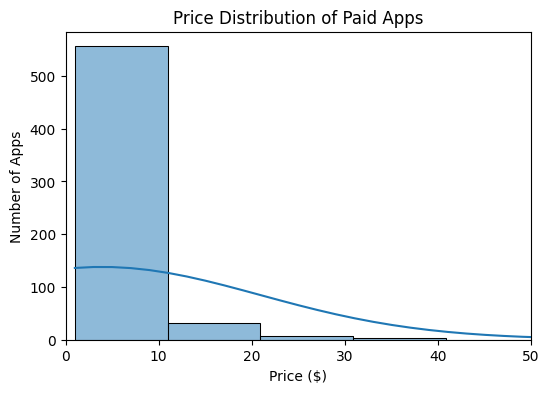

In [19]:
paid_apps = df[df['Type'] == 'Paid']
plt.figure(figsize=(6,4))
sns.histplot(paid_apps['Price'], bins=40, kde=True)
plt.xlim(0, 50)
plt.title('Price Distribution of Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Number of Apps')
plt.show()

Installs vs Rating

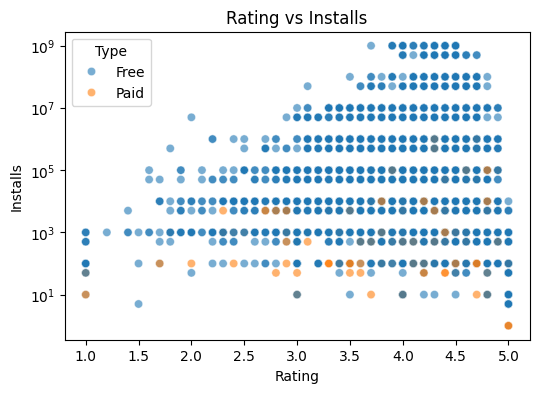

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Rating', y='Installs', hue='Type', alpha=0.6)
plt.title('Rating vs Installs')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.yscale('log')
plt.show()

Average rating by category

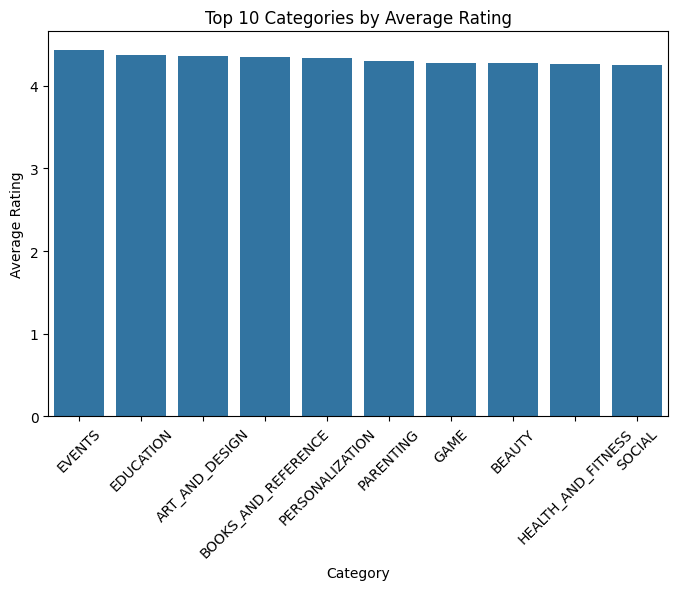

In [22]:
category_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=category_rating.index, y=category_rating.values)
plt.xticks(rotation=45)
plt.title('Top 10 Categories by Average Rating')
plt.ylabel('Average Rating')
plt.show()

App size vs rating

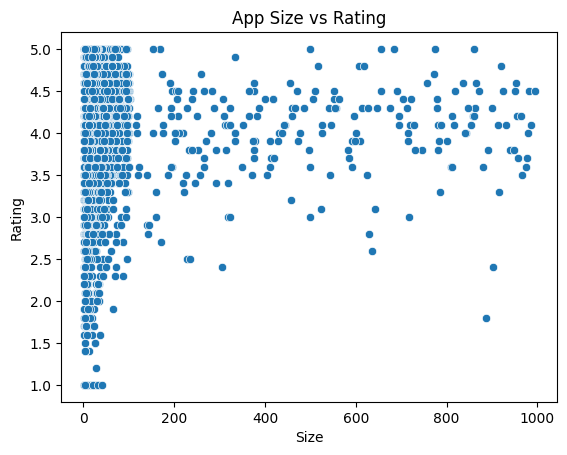

In [15]:
if 'Size' in df.columns:
    df['Size'] = df['Size'].replace('Varies with device', None)
    df['Size'] = df['Size'].str.replace('M', '').str.replace('k', '')
    df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
    sns.scatterplot(data=df, x='Size', y='Rating')
    plt.title('App Size vs Rating')
    plt.show()

Boxplot of Rating by Content Rating

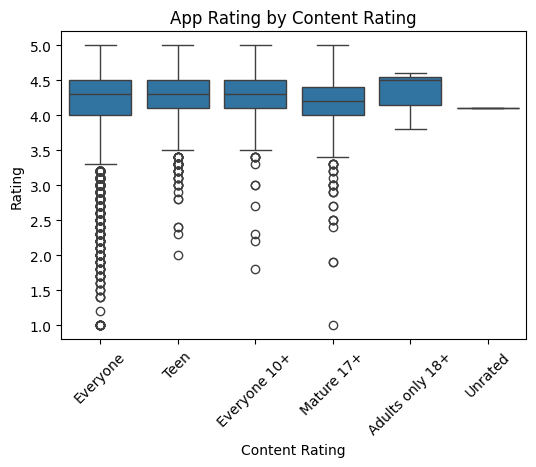

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Content Rating', y='Rating')
plt.xticks(rotation=45)
plt.title('App Rating by Content Rating')
plt.show()